In [2]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data
df = pd.read_csv("Training.csv")

# Split features and target
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Step 1: Remove highly correlated features
def remove_correlated_features(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"🔍 Dropping {len(to_drop)} correlated features: {to_drop}")
    return data.drop(columns=to_drop), to_drop

X_cleaned, dropped_features = remove_correlated_features(X)

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Naive Bayes (BernoulliNB for binary features)
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)

print("\n📈 Naive Bayes Accuracy:", round(nb_acc * 100, 2), "%")
print("\n📋 NB Classification Report:")
print(classification_report(y_test, nb_preds))

# Step 4: MLP (Standardization needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_preds = mlp_model.predict(X_test_scaled)
mlp_proba = mlp_model.predict_proba(X_test_scaled)
mlp_acc = accuracy_score(y_test, mlp_preds)

print("\n🧠 MLP Accuracy:", round(mlp_acc * 100, 2), "%")
print("\n📋 MLP Classification Report:")
print(classification_report(y_test, mlp_preds))

# Step 5: Save the best performing model
os.makedirs("model", exist_ok=True)

if mlp_acc >= nb_acc:
    joblib.dump((mlp_model, scaler, dropped_features), "model/best_model.pkl")
    print("\n✅ Saved best model: MLP to model/best_model.pkl")
    best_model = "MLP"
else:
    joblib.dump((nb_model, dropped_features), "model/best_model.pkl")
    print("\n✅ Saved best model: Naive Bayes to model/best_model.pkl")
    best_model = "Naive Bayes"

# Step 6: Save prediction results for MLP
output = pd.DataFrame(X_test_scaled, columns=X_cleaned.columns)
output["true_label"] = y_test.values
output["predicted"] = mlp_preds
output["confidence (%)"] = mlp_proba.max(axis=1) * 100
output.to_csv("mlp_predicted_results.csv", index=False)

print(f"\n📁 Prediction results saved to mlp_predicted_results.csv (Best model: {best_model})")


🔍 Dropping 42 correlated features: ['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']

📈 Naive Bayes Accuracy: 100.0 %

📋 NB Classification Report:
                             

In [3]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [5]:
# STEP 2: Load dataset
df = pd.read_csv("Training.csv")  # Replace with correct filename if different
print("Shape:", df.shape)
df.head()


Shape: (4920, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
# STEP 3: Separate features and target
X = df.drop(columns=["prognosis"])
y = df["prognosis"]


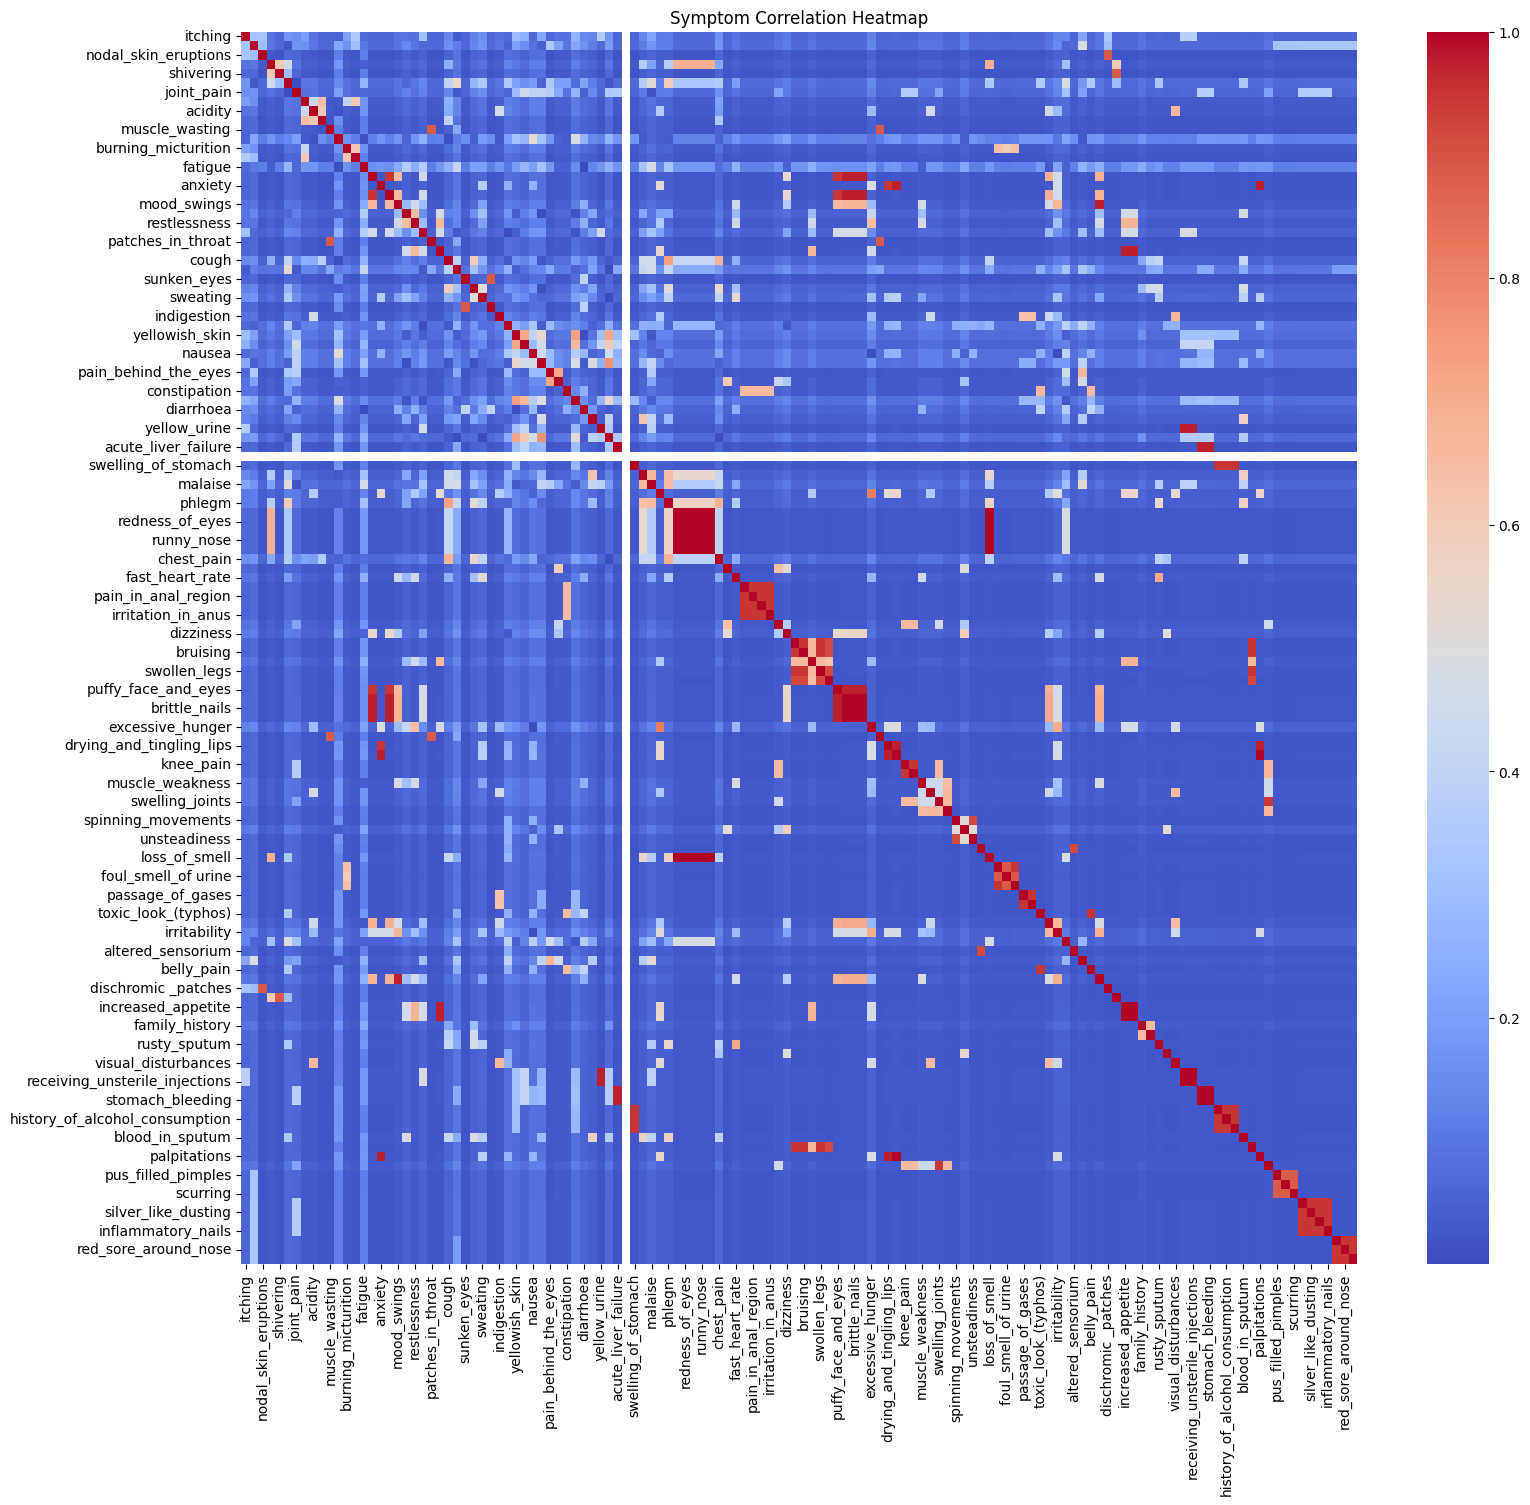

In [7]:
# STEP 4: Correlation heatmap
plt.figure(figsize=(18, 16))
corr_matrix = X.corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Symptom Correlation Heatmap")
plt.show()


In [8]:
# STEP 5: Drop highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_cleaned = X.drop(columns=to_drop)

print(f"Dropped {len(to_drop)} correlated features:")
print(to_drop)


Dropped 42 correlated features:
['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']


In [11]:
# Step: Recalculate correlation matrix on cleaned data
corr_matrix_cleaned = X_cleaned.corr().abs()

# Check for any remaining high correlations above 0.9
high_corr_pairs = [
    (col1, col2, corr_matrix_cleaned.loc[col1, col2])
    for i, col1 in enumerate(corr_matrix_cleaned.columns)
    for j, col2 in enumerate(corr_matrix_cleaned.columns)
    if i < j and corr_matrix_cleaned.loc[col1, col2] > 0.9
]

# Print result
if not high_corr_pairs:
    print("✅ All highly correlated features successfully removed. No remaining pairs with correlation > 0.9.")
else:
    print("⚠️ Still correlated feature pairs found (correlation > 0.9):")
    for col1, col2, corr_value in high_corr_pairs:
        print(f"{col1} and {col2} — Correlation: {corr_value:.2f}")


✅ All highly correlated features successfully removed. No remaining pairs with correlation > 0.9.


In [9]:
# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42, stratify=y)


📈 Naive Bayes Accuracy: 100.0 %
📋 Classification Report (Naive Bayes):
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Co

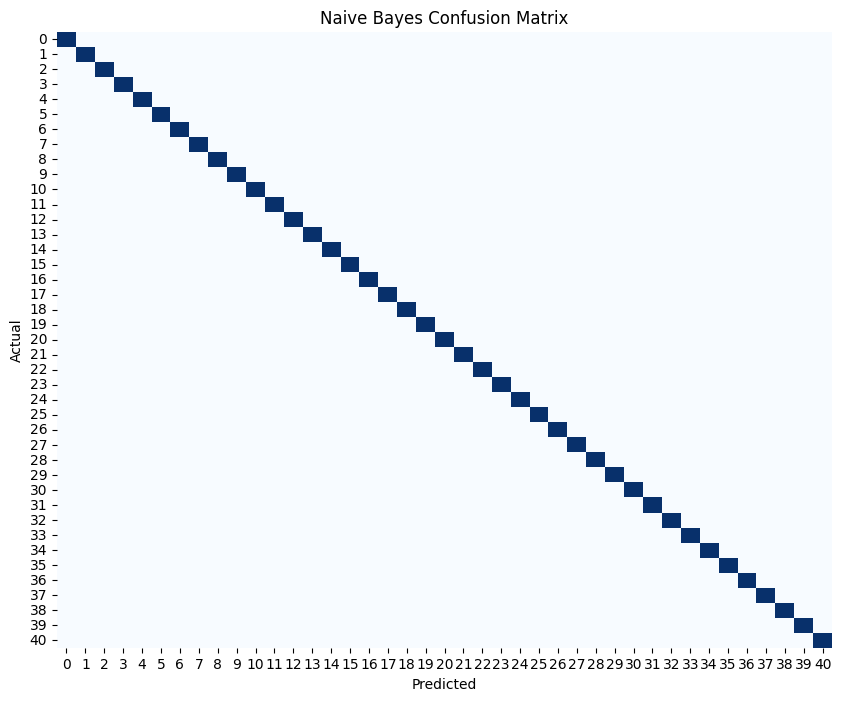

In [12]:
# STEP 7: Naive Bayes (BernoulliNB)
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)

print("📈 Naive Bayes Accuracy:", round(nb_acc * 100, 2), "%")
print("📋 Classification Report (Naive Bayes):")
print(classification_report(y_test, nb_preds))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, nb_preds), cmap='Blues', cbar=False)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🧠 MLP Accuracy: 100.0 %
📋 Classification Report (MLP):
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00   

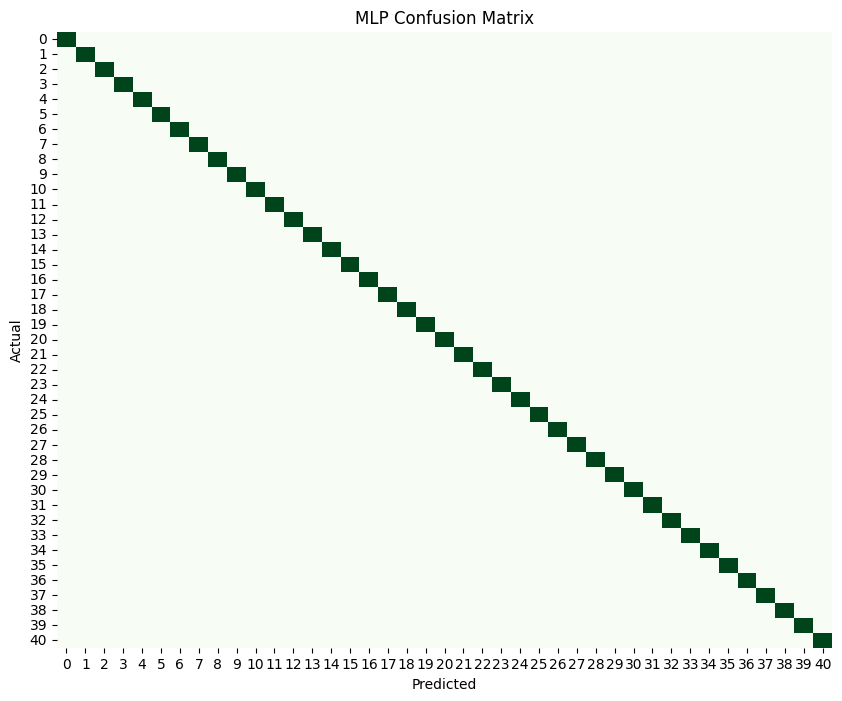

In [13]:
# STEP 8: MLP Classifier (with Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_preds = mlp_model.predict(X_test_scaled)
mlp_proba = mlp_model.predict_proba(X_test_scaled)
mlp_acc = accuracy_score(y_test, mlp_preds)

print("🧠 MLP Accuracy:", round(mlp_acc * 100, 2), "%")
print("📋 Classification Report (MLP):")
print(classification_report(y_test, mlp_preds))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, mlp_preds), cmap='Greens', cbar=False)
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
# STEP 9: Export MLP prediction results
output = pd.DataFrame(X_test_scaled, columns=X_cleaned.columns)
output["true_label"] = y_test.values
output["predicted"] = mlp_preds
output["confidence (%)"] = mlp_proba.max(axis=1) * 100

# Show few results
output.head()

# Save to CSV
output.to_csv("mlp_prediction_results.csv", index=False)
print("✅ Predictions saved to mlp_prediction_results.csv")


✅ Predictions saved to mlp_prediction_results.csv


In [16]:
import joblib
import os

# Save model, scaler, and dropped feature list
os.makedirs("model", exist_ok=True)
joblib.dump((mlp_model, scaler, to_drop), "model/mlp_model.pkl")


['model/mlp_model.pkl']

In [17]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# ✅ Load trained model and scaler (+ to_drop list of dropped correlated features)
model_bundle = joblib.load("model/mlp_model.pkl")

# Unpack based on your saved object structure
try:
    model, scaler, to_drop = model_bundle  # For MLP (with scaler & to_drop)
except:
    model, to_drop = model_bundle
    scaler = None  # For Naive Bayes

# ✅ Load test data
test_df = pd.read_csv("testing (1).csv")  # Replace with your actual file
X_test = test_df.drop(columns=["prognosis"], errors='ignore')
y_test = test_df["prognosis"]

# ✅ Drop the same correlated features
X_test_cleaned = X_test.drop(columns=to_drop)

# ✅ For MLP: scale the features
if scaler is not None:
    X_test_processed = scaler.transform(X_test_cleaned)
else:
    X_test_processed = X_test_cleaned  # For Naive Bayes (no scaling)

# ✅ Predict
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)

# ✅ Evaluate
print("📊 Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Save predictions
output = X_test_cleaned.copy()
output["true_label"] = y_test.values
output["predicted"] = y_pred
output["confidence (%)"] = y_proba.max(axis=1) * 100
output.to_csv("mlp_test_predictions.csv", index=False)
print("✅ Test results saved to mlp_test_predictions.csv")


📊 Accuracy: 92.68 %

📋 Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_